<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/ExcelWorkingfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Install XlsxWriter library
!pip install XlsxWriter

     |████████████████████████████████| 149 kB 26.1 MB/s 


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import io

from sklearn.datasets import make_regression

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

In [ ]:
# Create Excel working file
writer = pd.ExcelWriter(
    'example.xlsx',
    engine = 'xlsxwriter'
)
workbook  = writer.book #Set working book

# Without .save(), the excel file will not be created
# Save Excel working file
writer.save()

### `example.xlsx` created by `Pandas.ExcelWriter()`
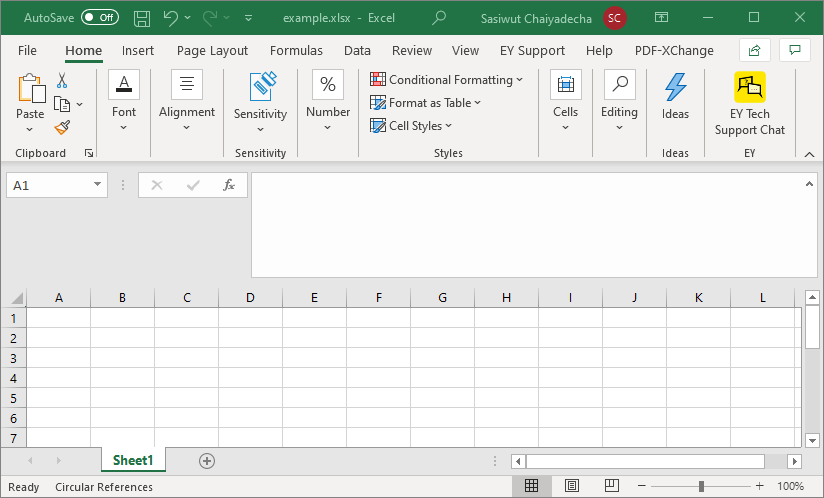

In [ ]:
# Create Excel working sheet from Pandas DataFrame
X, y = make_regression(
    n_samples = 10,
    n_features = 2,
    noise = 0.1,
    random_state = 101
)

# To DataFrame
df = pd.DataFrame(
    {
        'X1': X[:, 0],
        'X2': X[:, 1],
        'y' : y
    }
)

# Export to Excel to specific sheet
df.to_excel(
    writer,
    index = False,
    sheet_name = 'exportDataFrame'
)

# Save Excel working file
writer.save()

### Export Pandas DataFrame to specific Excel sheet

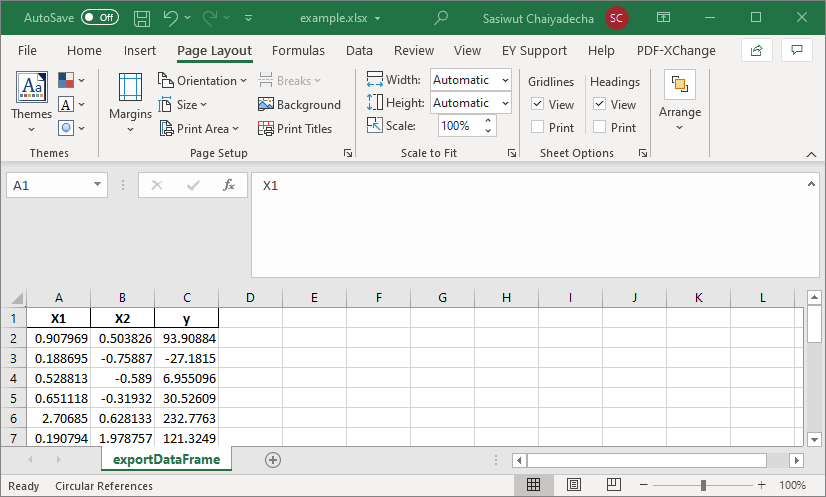

In [ ]:
# Excel formatting
# Set numeric format
intFormat = workbook.add_format()
intFormat.set_num_format('#,##0')

floatFormat = workbook.add_format()
floatFormat.set_num_format('0.0000')

percentFormat = workbook.add_format()
percentFormat.set_num_format('0.00%')

# Set background format
redFormat = workbook.add_format({'bg_color': '#c00000'})
yellowFormat = workbook.add_format({'bg_color': '#ffbf00'})
greenFormat = workbook.add_format({'bg_color': '#92d050'})

In [ ]:
# Excel working sheet
worksheet = writer.sheets['exportDataFrame'] #Set work sheet

worksheet.hide_gridlines(2) #Hide gridline
worksheet.write(0, 4, 'Regression table') #Write text

#Set cell format
worksheet.set_column('A:A', None, percentFormat) 
worksheet.set_column('B:B', None, floatFormat)
worksheet.set_column('C:C', None, intFormat)

# Save Excel working file
writer.save()

### Excel modify work sheet and formatting

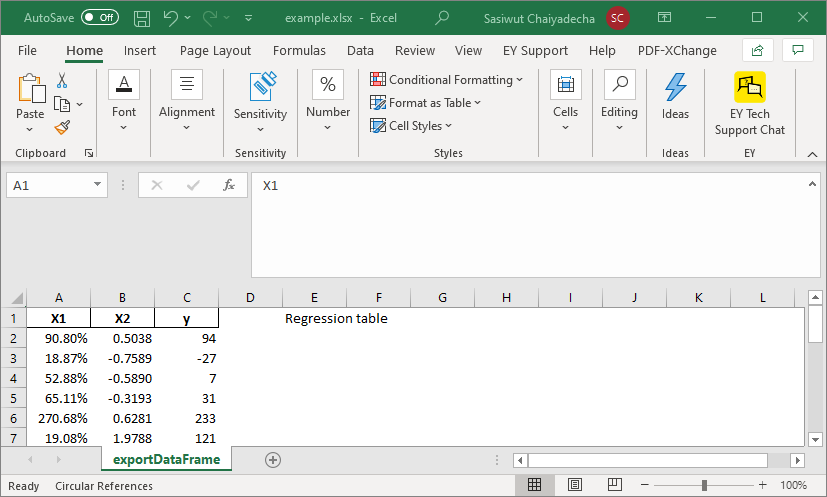

In [ ]:
# Condition formatting
worksheet = writer.sheets['exportDataFrame'] #Set work sheet

# Data bar
worksheet.conditional_format(
    f'A2:A{df.shape[0] + 1}',
    {
        'type': 'data_bar',
        'bar_solid': True,
        'bar_color': '#ffd500'
    }
)
                                                                
# Color scale
worksheet.conditional_format(
    f'B2:B{df.shape[0] + 1}',
    {
        'type': '3_color_scale',
        'min_color': 'green',
        'mid_color': 'yellow',
        'max_color': 'red'
    }
)

# Condition criteria
worksheet.conditional_format(
    'C2',
    {
        'type': 'cell',
        'criteria': 'between',
        'minimum': 0,
        'maximum': 100,
        'format': greenFormat
    }
)

# Save Excel working file
writer.save()

### Condition formatting

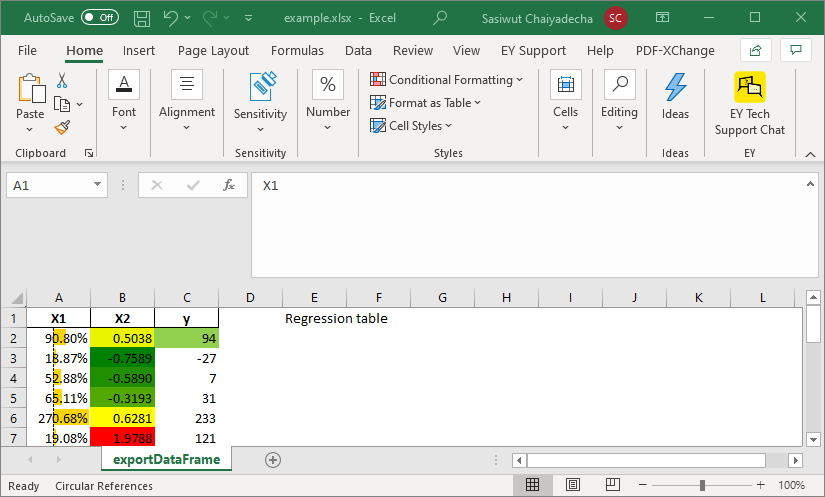

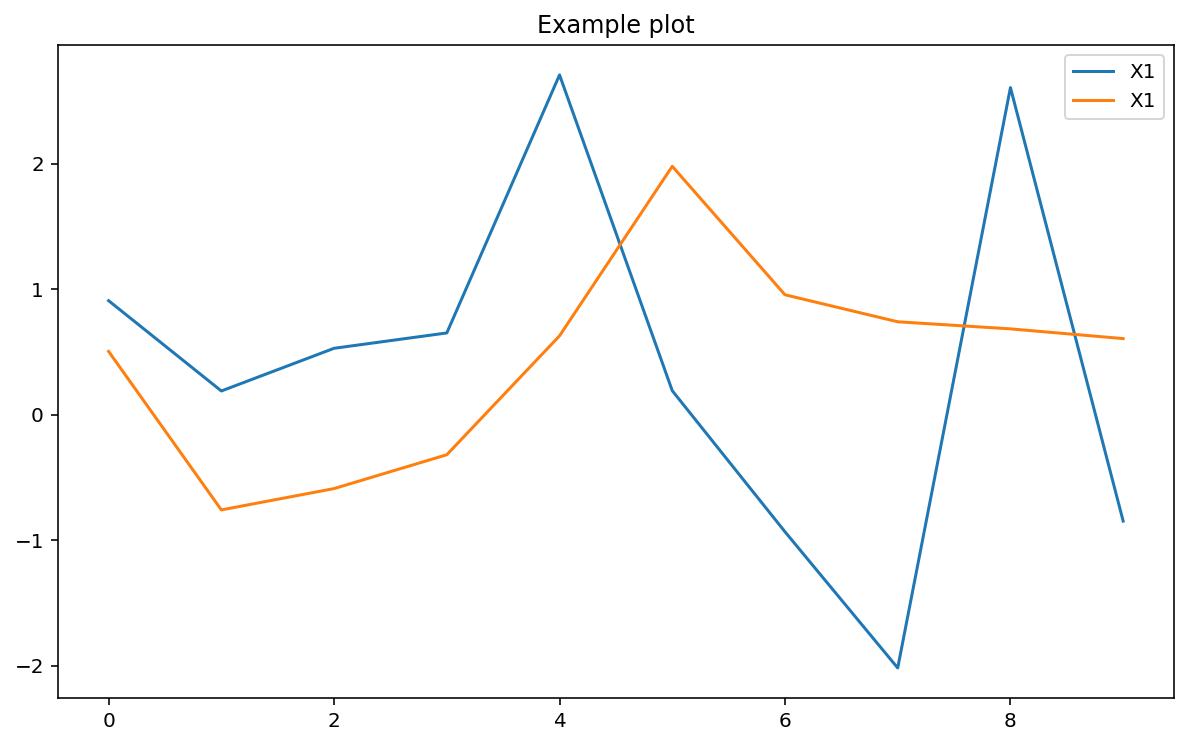

In [ ]:
# Image IO
imageObject = io.BytesIO()

# Plot
plt.figure(figsize = (10, 6))
plt.plot(df['X1'], label = 'X1')
plt.plot(df['X2'], label = 'X1')
plt.legend(frameon = True, facecolor = 'white')
plt.title('Example plot')
plt.savefig(imageObject, format = 'png') #Save image to BytesIO
plt.show()

# Insert plot to Excel
worksheet.insert_image(
    'E2',
    '', #Don't need file name
    {
        'image_data': imageObject,
        'x_scale': 0.6,
        'y_scale': 0.6
    }
)

# Save Excel working file
writer.save()

### Insert images to Excel sheet

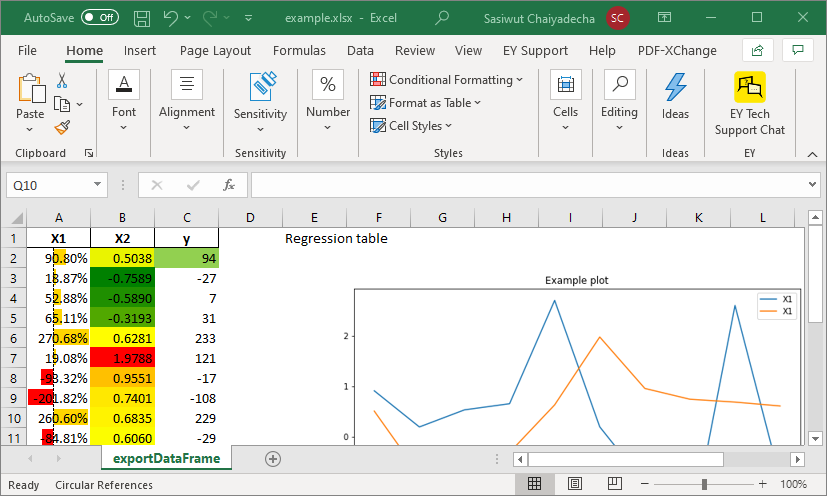